<a href="https://colab.research.google.com/github/Crakedhead42/Aayush.github.io/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [2]:
# Your code goes here

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler


data=pd.read_csv("C:/Users/aayus/Downloads/glass.csv")
data.drop_duplicates(inplace=True)
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/aayus/Downloads/glass.csv'

In [9]:
# Download the file from the Google Drive link
!gdown --id 17cbDNBmys04MJqQfrma3jd72VPMnxIq0 -O /tmp/glass.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17cbDNBmys04MJqQfrma3jd72VPMnxIq0
To: /tmp/glass.csv
100% 10.1k/10.1k [00:00<00:00, 27.0MB/s]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

# Load the data from the downloaded file
data=pd.read_csv("/tmp/glass.csv")
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [11]:
#we are separating feature and target variable
X=data.drop("Type",axis=1)
y=data["Type"]

#Now we are splitting the data into training sets and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [12]:
#Scaling the data

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
def knn_model(train_x,train_label,test_x,k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    return y_pred


In [15]:
import math
n=data.shape[0]
k_max=math.sqrt(n)
# k_max=round(k_max)
print(k_max)

14.594519519326424


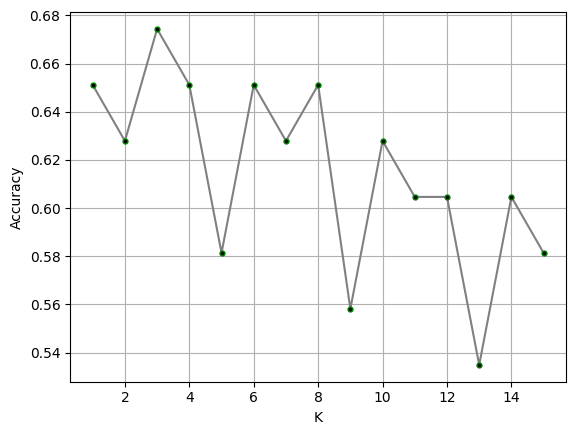

In [17]:
normal_accuracy = []
k_values = range(1,16)

for k in k_values :
    y_pred = knn_model(X_train,y_train,X_test,k)
    accur = accuracy_score(y_test,y_pred)
    normal_accuracy.append(accur)

plt.plot(k_values,normal_accuracy,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()